In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [2]:
import gensim.downloader as api
import spacy

In [3]:
wv = api.load('word2vec-google-news-300')

In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
# Read the dataset
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Remove all NaN values
df_fake = df_fake.dropna()
df_true = df_true.dropna()

In [6]:
# View dataset
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
# Add new column ‘class’ as news category
df_fake["class"] = 0
df_true["class"] = 1

In [9]:
# Print the shape of the dataframe after removing NaN values
print("Shape of the df_true after removing NaN values:", df_true.shape)
print("Shape of the df_fake after removing NaN values:", df_fake.shape)

Shape of the df_true after removing NaN values: (21417, 5)
Shape of the df_fake after removing NaN values: (23481, 5)


In [10]:
# Merging True and Fake Dataframes
# Reset Index
df = pd.concat([df_true, df_fake], axis =0 ).reset_index(drop=True)
df.shape

(44898, 5)

In [11]:
# Computer performance is limited
# Select a part as training set and test set 

# Set the seed value to ensure reproducible results
np.random.seed(7003)  

# Randomly select 2000 rows as training set 
train_index = np.random.choice(df.shape[0], size=2000, replace=False)
train_set = df.iloc[train_index]

# Randomly select 400 rows from the remaining ones as the test set
df_left = df.drop(train_index).reset_index(drop=True) # Reset Index
test_index = np.random.choice(df_left.shape[0], size=400, replace=False)
test_set = df_left.iloc[test_index]

In [12]:
# Merging True and Fake Dataframes
# Reset Index
#df_train = pd.concat([train_true_set, train_fake_set], axis =0 ).reset_index(drop=True)
#df_test = pd.concat([test_true_set, test_fake_set], axis =0 ).reset_index(drop=True)

In [13]:
test_set.head()

,title,text,subject,date,class
21189,BREAKING: Desperate GOP Senators Drag John Mc...,"By now, we all know that upon having emergency...",News,"July 24, 2017",0
33470,UN OFFICIAL TIED TO CLINTONS Set To Face Trial...,Vince Foster Part II?The death by barbell of d...,politics,"Jun 26, 2016",0
32167,BREAKING: NO CHARGES For Police Officer In Sho...,Riots erupted in Charlotte after police office...,politics,"Nov 30, 2016",0
18041,14 people shot dead at Mexican drug rehab center,MEXICO CITY (Reuters) - Fourteen people were s...,worldnews,"September 27, 2017",1
10924,Rescuers search for Philippine storm victims a...,MANILA (Reuters) - Rescuers in the Philippines...,worldnews,"December 24, 2017",1


In [14]:
# nlp process
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return wv.get_mean_vector(filtered_tokens)

In [15]:
train_set.loc[:, 'vector'] = train_set['text'].apply(preprocess_and_vectorize)

C:\Users\zcx\AppData\Local\Temp\ipykernel_34792\3892854938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.loc[:, 'vector'] = train_set['text'].apply(preprocess_and_vectorize)


In [16]:
test_set.loc[:, 'vector'] = test_set['text'].apply(preprocess_and_vectorize)

C:\Users\zcx\AppData\Local\Temp\ipykernel_34792\2621349093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.loc[:, 'vector'] = test_set['text'].apply(preprocess_and_vectorize)


In [17]:
# Segregating feature and Target¶
x_train=train_set['vector'].values
y_train=train_set['class'].values

x_test=test_set['vector'].values
y_test=test_set['class'].values

In [18]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [19]:
x_train_2d

array([[-0.00352509, -0.00576558, -0.00659533, ..., -0.00580222,
         0.01238924,  0.00315448],
       [-0.00169359,  0.00996349, -0.0037373 , ..., -0.01529587,
         0.01586773,  0.02413636],
       [ 0.0150472 ,  0.02031746,  0.01151578, ..., -0.03528052,
         0.01631122,  0.01362469],
       ...,
       [ 0.00269255,  0.00175596, -0.00481618, ...,  0.00311723,
         0.00053351, -0.03629231],
       [-0.00158512,  0.00633865,  0.00439705, ..., -0.00866775,
         0.03126187, -0.01366081],
       [ 0.00800944,  0.00821242,  0.02631441, ..., -0.02543542,
         0.01877393,  0.02522783]], dtype=float32)

In [21]:
train_set.to_excel('final train.xlsx')
test_set.to_excel('final test.xlsx')

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knc = KNeighborsClassifier()
knc.fit(x_train_2d, y_train)

y_pred_knc = knc.predict(x_test_2d)
acc_knc = accuracy_score(y_test, y_pred_knc)
print("KNN classification report")
print(classification_report(y_test, y_pred_knc, digits=4))

KNN classification report
              precision    recall  f1-score   support

           0     0.9424    0.8867    0.9137       203
           1     0.8900    0.9442    0.9163       197

    accuracy                         0.9150       400
   macro avg     0.9162    0.9154    0.9150       400
weighted avg     0.9166    0.9150    0.9150       400



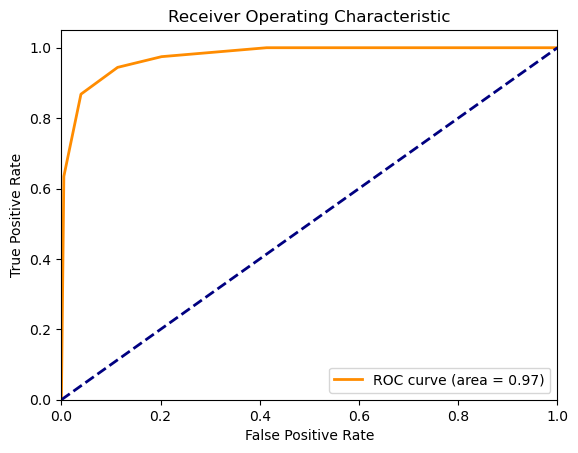

In [23]:
# Plotting the ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_prob = knc.predict_proba(x_test_2d)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # calculate FPR and TPR
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
roc_auc

0.9748318371633617

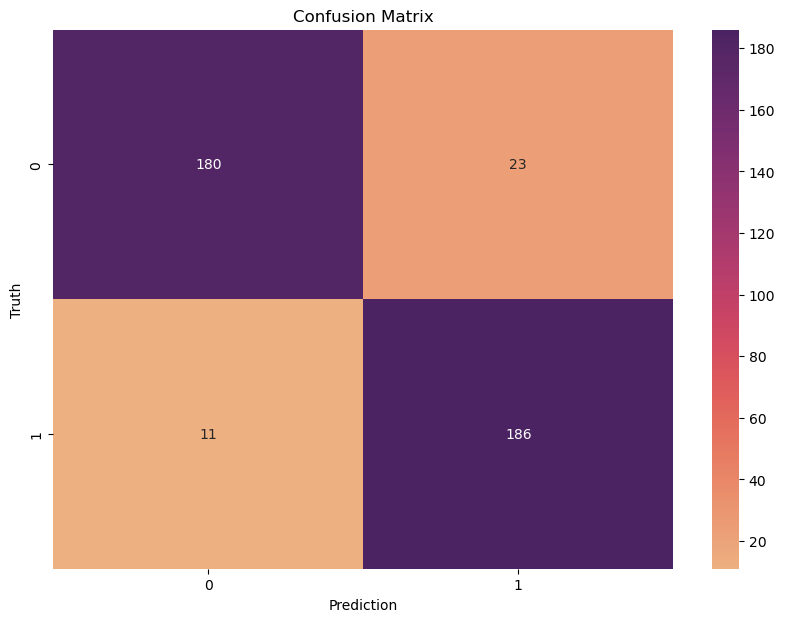

In [25]:
# Making a confusion matrix

cm_knc = confusion_matrix(y_test, y_pred_knc)
plt.figure(figsize=(10, 7))
sn.heatmap(cm_knc, annot=True, fmt='d',cmap='flare')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Use cross validation

from sklearn.model_selection import cross_validate

scores = cross_validate(knc, x_train_2d, y_train, cv=10, 
                        scoring =  
                        ['accuracy','precision_macro',
                         'recall_macro','f1_macro'])
for metric in ['test_accuracy', 'test_precision_macro',
               'test_recall_macro', 'test_f1_macro']:
    mean_score = np.mean(scores[metric])
    print(f"{metric}'s average: {mean_score}")

test_accuracy's average: 0.9189999999999999
test_precision_macro's average: 0.9201047249159344
test_recall_macro's average: 0.920501253132832
test_f1_macro's average: 0.9189623978286278


## LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_2d, y_train)

y_pred_lr = lr.predict(x_test_2d)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("LogisticRegression classification report")
print(classification_report(y_test, y_pred_lr, digits=4))

LogisticRegression classification report
              precision    recall  f1-score   support

           0     0.9307    0.9261    0.9284       203
           1     0.9242    0.9289    0.9266       197

    accuracy                         0.9275       400
   macro avg     0.9275    0.9275    0.9275       400
weighted avg     0.9275    0.9275    0.9275       400



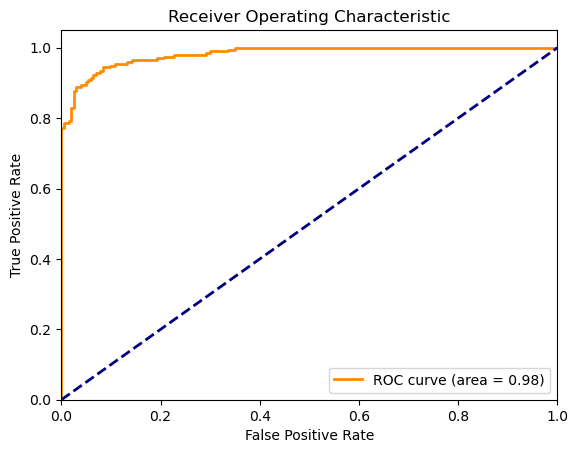

In [28]:
# Plotting the ROC Curve

y_pred_prob = lr.predict_proba(x_test_2d)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # calculate FPR and TPR
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
roc_auc

0.981970943462279

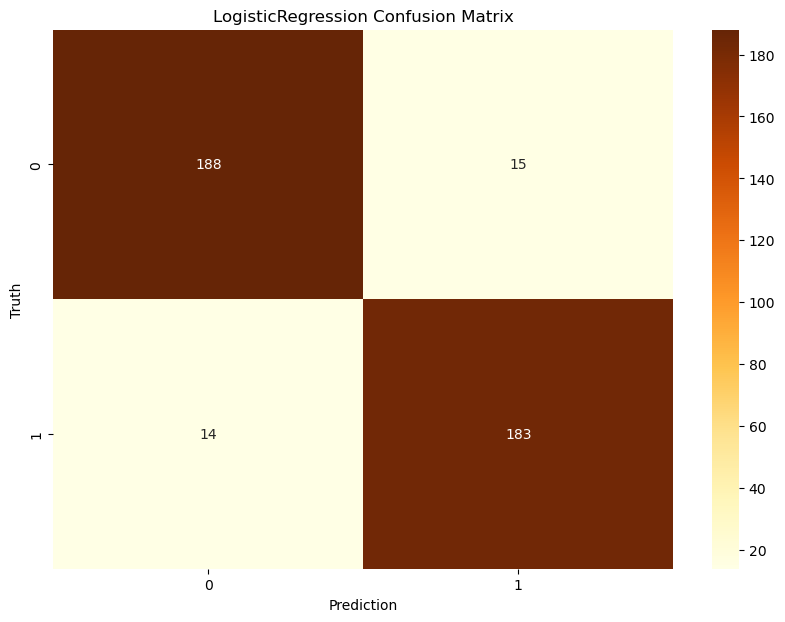

In [31]:
# Making a confusion matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sn.heatmap(cm_lr, annot=True, fmt='d',cmap='YlOrBr')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title("LogisticRegression Confusion Matrix")
plt.show()

In [32]:
# Use cross validation

scores = cross_validate(lr, x_train_2d, y_train, cv=10, 
                        scoring =  ['accuracy','precision_macro',
                                    'recall_macro','f1_macro'])

for metric in ['test_accuracy', 'test_precision_macro',
               'test_recall_macro', 'test_f1_macro']:
    mean_score = np.mean(scores[metric])
    print(f"{metric}'s average: {mean_score}")

test_accuracy's average: 0.917
test_precision_macro's average: 0.9169756443693645
test_recall_macro's average: 0.9170426065162907
test_f1_macro's average: 0.9168079004220344


## DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_2d, y_train)

y_pred_dtc = dtc.predict(x_test_2d)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("DecisionTreeClassifier classification report")
print(classification_report(y_test, y_pred_dtc, digits=4))

DecisionTreeClassifier classification report
              precision    recall  f1-score   support

           0     0.8447    0.8571    0.8509       203
           1     0.8505    0.8376    0.8440       197

    accuracy                         0.8475       400
   macro avg     0.8476    0.8474    0.8474       400
weighted avg     0.8475    0.8475    0.8475       400



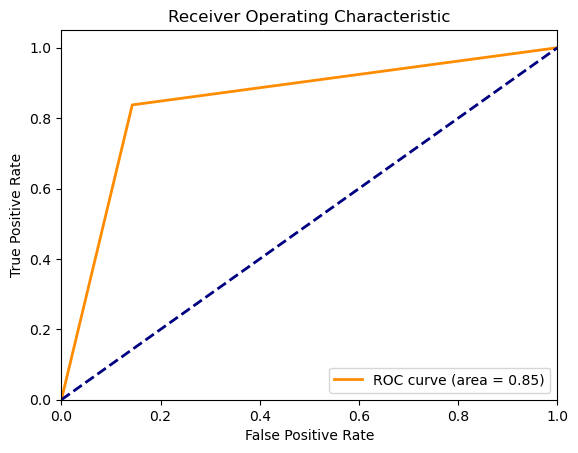

In [34]:
# Plotting the ROC Curve

y_pred_prob = dtc.predict_proba(x_test_2d)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # calculate FPR and TPR
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
roc_auc

0.8473531544597536

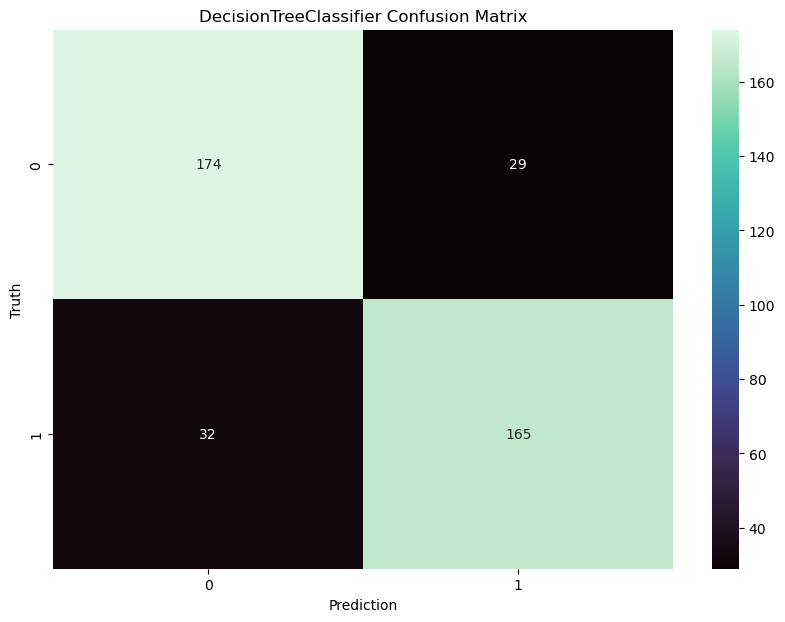

In [36]:
# Making a confusion matrix

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(10, 7))
sn.heatmap(cm_dtc, annot=True, fmt='d',cmap='mako')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title("DecisionTreeClassifier Confusion Matrix")
plt.show()

In [37]:
# Use cross validation

scores = cross_validate(dtc, x_train_2d, y_train, cv=10, 
                        scoring =  ['accuracy','precision_macro',
                                    'recall_macro','f1_macro'])

for metric in ['test_accuracy', 'test_precision_macro',
               'test_recall_macro', 'test_f1_macro']:
    mean_score = np.mean(scores[metric])
    print(f"{metric}'s average: {mean_score}")

test_accuracy's average: 0.8375
test_precision_macro's average: 0.8375772707256341
test_recall_macro's average: 0.837218045112782
test_f1_macro's average: 0.8370712450703769


### DecisionTree optimization

In [38]:
from sklearn.model_selection import cross_val_score

path = dtc.cost_complexity_pruning_path(x_train_2d, y_train)
ccp_alphas = path.ccp_alphas

optimal_alpha = None
best_score = 0

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(x_train_2d, y_train)
    score = cross_val_score(clf, x_train_2d, y_train, cv=5).mean()  # Evaluating performance using cross validation
    if score > best_score:
        best_score = score
        optimal_alpha = alpha

print(f"Optimal ccp_alpha: {optimal_alpha} with best score: {best_score}")

Optimal ccp_alpha: 0.0035199069003285788 with best score: 0.853


In [39]:
# Refit with optimal cp value

dtc_new = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
dtc_new.fit(x_train_2d, y_train)
y_pred_new = dtc_new.predict(x_test_2d)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("DecisionTreeClassifier classification report")
print(classification_report(y_test, y_pred_new, digits=4))

DecisionTreeClassifier classification report
              precision    recall  f1-score   support

           0     0.8557    0.8473    0.8515       203
           1     0.8442    0.8528    0.8485       197

    accuracy                         0.8500       400
   macro avg     0.8500    0.8500    0.8500       400
weighted avg     0.8501    0.8500    0.8500       400



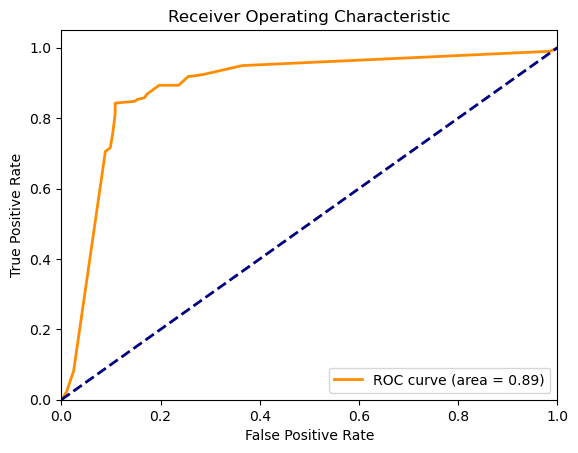

In [45]:
# Plotting the ROC Curve

y_pred_prob = dtc_new.predict_proba(x_test_2d)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # calculate FPR and TPR
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
roc_auc

0.8871996199144807

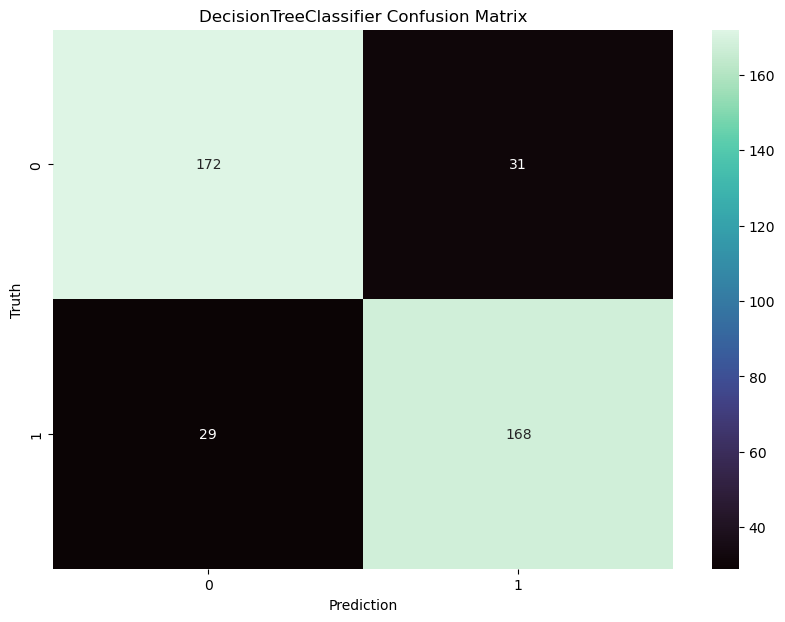

In [47]:
# Making a confusion matrix

cm_dtc_new = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(10, 7))
sn.heatmap(cm_dtc_new, annot=True, fmt='d',cmap='mako')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title("DecisionTreeClassifier Confusion Matrix")
plt.show()

In [48]:
# Use cross validation

scores = cross_validate(dtc_new, x_train_2d, y_train, cv=10, scoring =  ['accuracy','precision_macro','recall_macro','f1_macro'])

for metric in ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']:
    mean_score = np.mean(scores[metric])
    print(f"{metric}'s average: {mean_score}")

test_accuracy's average: 0.857
test_precision_macro's average: 0.8574446012952809
test_recall_macro's average: 0.857593984962406
test_f1_macro's average: 0.8567961906006707


## RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# The error is because the same pointer type in two packages uses uppercase and lowercase UINT32_t and uint32_t respectively (in fact, the definition is the same)
# The problem is solved by downgrading cython to below 3.0 (I use Cython==0.29.24) and restarting to solve it
# Similar problem：https://github.com/scikit-learn/scikit-learn/issues/28617

In [50]:
rfc = RandomForestClassifier()
rfc.fit(x_train_2d, y_train)

y_pred_rfc = rfc.predict(x_test_2d)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("RandomForestClassifier classification report")
print(classification_report(y_test, y_pred_rfc, digits=4))

RandomForestClassifier classification report
              precision    recall  f1-score   support

           0     0.9353    0.9261    0.9307       203
           1     0.9246    0.9340    0.9293       197

    accuracy                         0.9300       400
   macro avg     0.9300    0.9301    0.9300       400
weighted avg     0.9301    0.9300    0.9300       400



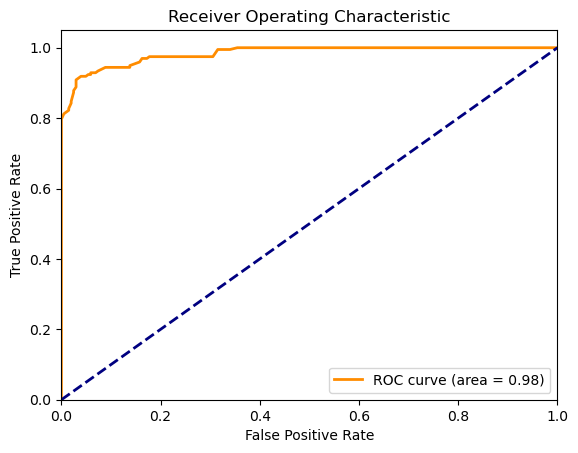

In [52]:
# Plotting the ROC Curve

y_pred_prob = rfc.predict_proba(x_test_2d)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # calculate FPR and TPR
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
roc_auc

0.9829836713260484

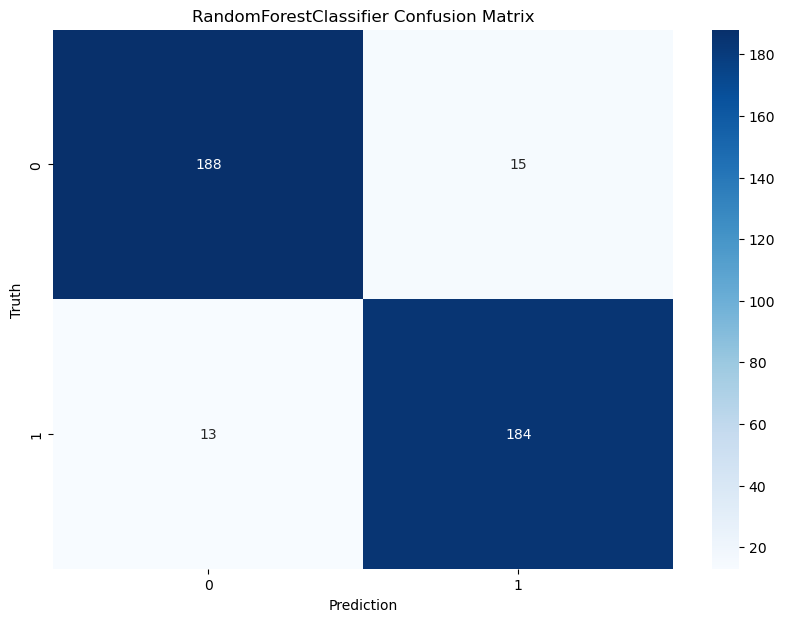

In [54]:
# Making a confusion matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(10, 7))
sn.heatmap(cm_rfc, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [55]:
# Use cross validation

scores = cross_validate(rfc, x_train_2d, y_train, cv=10, 
                        scoring =  ['accuracy','precision_macro',
                                    'recall_macro','f1_macro'])

for metric in ['test_accuracy', 'test_precision_macro', 
               'test_recall_macro', 'test_f1_macro']:
    mean_score = np.mean(scores[metric])
    print(f"{metric}'s average: {mean_score}")

test_accuracy's average: 0.9385
test_precision_macro's average: 0.9384392346883912
test_recall_macro's average: 0.9390726817042607
test_f1_macro's average: 0.9384187355816362


In [56]:
# Create a function to distinguish true from false news. 
# The function receives the news text and returns the results of four classifiers.

def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    df_new = pd.DataFrame({"text":[news]})
    df_new.loc[:, 'vector'] = df_new["text"].apply(preprocess_and_vectorize)
    new_x = df_new['vector'].values
    new_x_2d = np.stack(new_x)
    
    pred_knc = knc.predict(new_x_2d)
    pred_lr = lr.predict(new_x_2d)
    pred_dtc = dtc_new.predict(new_x_2d)
    pred_rfc = rfc.predict(new_x_2d)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_knc[0]),
                                                                                                             output_lable(pred_lr[0]),
                                                                                                             output_lable(pred_dtc[0]),
                                                                                                             output_lable(pred_rfc[0])))

In [57]:
news = str(input()) 
manual_testing(news)

 In a memo that stated they couldn’t even smell the stuff without gagging, officials at the Food and Drug Administration announced Wednesday a plan to ban Captain Morgan rum, citing the fact that they’d had way too much of that shit in college. “Captain Morgan Rum is not suitable for…ugh, we just need to get rid of that disgusting garbage,” FDA commissioner Robert M. Califf said between pauses to suppress his body’s reflexive urge to vomit, adding that Bacardi Raspberry would also be made illegal for human consumption as he finally retched into a mop bucket. “Our data indicates Captain Morgan rum is nasty as fuck. In one study, even the hardest drinkers in our friend group were throwing up by, like, 9:30 p.m. and were passed out in the bathtub a half hour later. In addition, the test subjects were completely hungover for the entire hellish weekend.” Califf, after admitting that maybe he could stomach Captain Morgan rum again now that so much time had passed, reportedly tried taking one



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News
